<a href="https://colab.research.google.com/github/InduwaraGayashan001/TensorFlow/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [2]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Load the Data

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


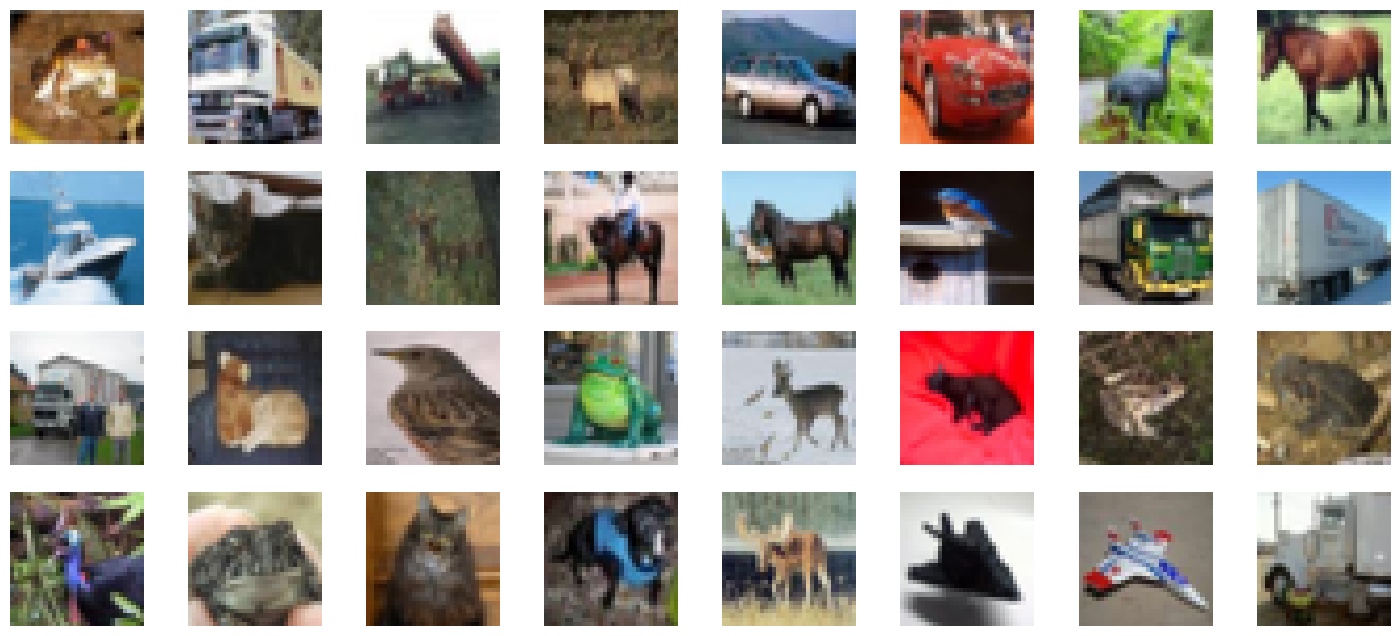

In [4]:
plt.figure(figsize=(18,8))

num_rows = 4
num_cols = 8
num_images = num_rows * num_cols

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')

plt.show()

# Data Preprocessing

In [5]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Dataset and Training Configuration

In [6]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int = 10
    IMG_HEIGHT: int = 32
    IMG_WIDTH: int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    BATCH_SIZE: int = 256
    EPOCHS: int = 31
    LEARNING_RATE: float = 0.001

# CNN model Implementation

In [7]:
def cnn_model(input_shape = (32,32,3)):

  model = Sequential()

  # Conv BLock 1: 32 filters , MaxPool
  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=input_shape))
  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Conv BLock 2: 64 filters , MaxPool
  model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Conv BLock 3: 64 filters , MaxPool
  model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Dense Layers
  model.add(Flatten())
  model.add(Dense(units=512, activation='relu'))
  model.add(Dense(units=10, activation='softmax'))

  return model



In [8]:
model = cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training

In [10]:
history = model.fit(X_train, y_train, batch_size=TrainingConfig.BATCH_SIZE, epochs=TrainingConfig.EPOCHS, verbose=True, validation_split=0.3)

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.1772 - loss: 2.2064 - val_accuracy: 0.3743 - val_loss: 1.7302
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3617 - loss: 1.7562 - val_accuracy: 0.3375 - val_loss: 1.8215
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4420 - loss: 1.5398 - val_accuracy: 0.4442 - val_loss: 1.5122
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5102 - loss: 1.3779 - val_accuracy: 0.5161 - val_loss: 1.3453
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5538 - loss: 1.2482 - val_accuracy: 0.5485 - val_loss: 1.2328
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6029 - loss: 1.1109 - val_accuracy: 0.5698 - val_loss: 1.1988
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6449 - loss: 1.0069 - val_accuracy: 0.5686 - val_loss: 1.2356
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6821 - loss: 0.9027 - val_acc

In [11]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS - 1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

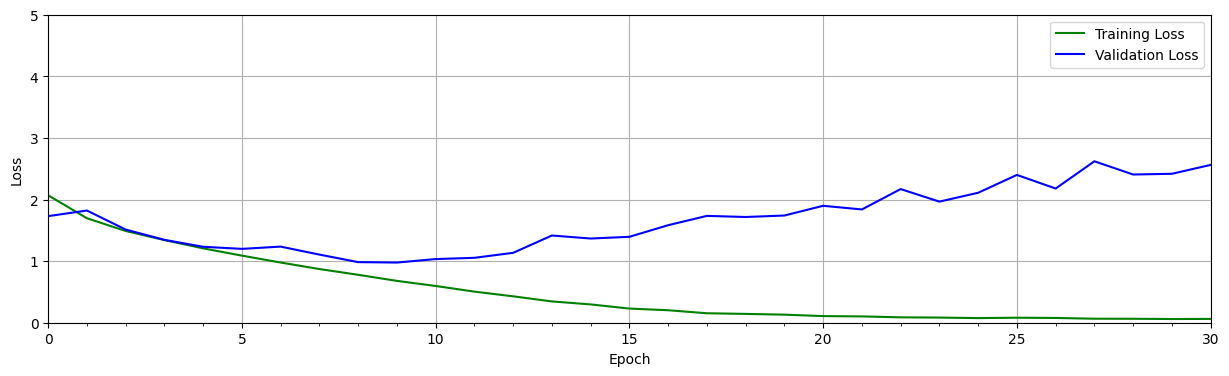

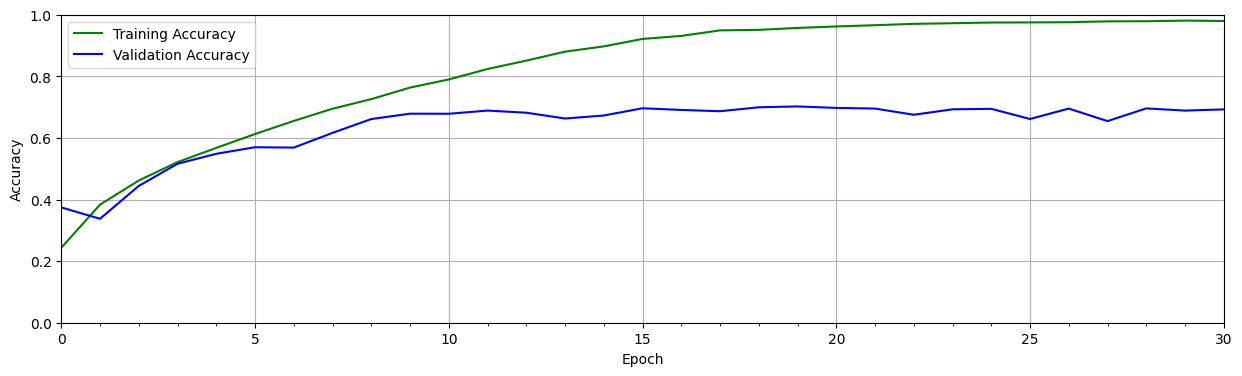

In [12]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

# Adding Dropout to the Model

In [13]:
def cnn_model_dropout(input_shape = (32,32,3)):

  model = Sequential()

  # Conv BLock 1: 32 filters , MaxPool
  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=input_shape))
  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # Conv BLock 2: 64 filters , MaxPool
  model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # Conv Block 3: 64 filters , MaxPool
  model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # Dense Layer
  model.add(Flatten())
  model.add(Dense(units=512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=10, activation='softmax'))

  return model

In [14]:
model_dropout = cnn_model_dropout()
model_dropout.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model_dropout.fit(X_train, y_train, batch_size=TrainingConfig.BATCH_SIZE, epochs=TrainingConfig.EPOCHS, verbose=True, validation_split=0.3)

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.1601 - loss: 2.2458 - val_accuracy: 0.1891 - val_loss: 2.3332
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2966 - loss: 1.9212 - val_accuracy: 0.3237 - val_loss: 1.8865
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3846 - loss: 1.6794 - val_accuracy: 0.4013 - val_loss: 1.6551
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4480 - loss: 1.5185 - val_accuracy: 0.4931 - val_loss: 1.3856
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4985 - loss: 1.3875 - val_accuracy: 0.5068 - val_loss: 1.3689
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5342 - loss: 1.2909 - val_accuracy: 0.5120 - val_loss: 1.3340
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5715 - loss: 1.2035 - val_accuracy: 0.6095 - val_loss: 1.1122
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5983 - loss: 1.1214 - val_acc

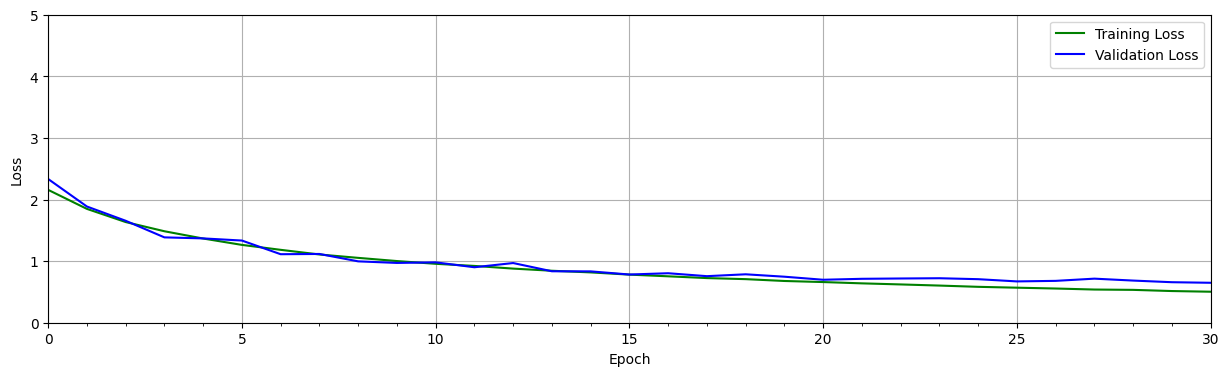

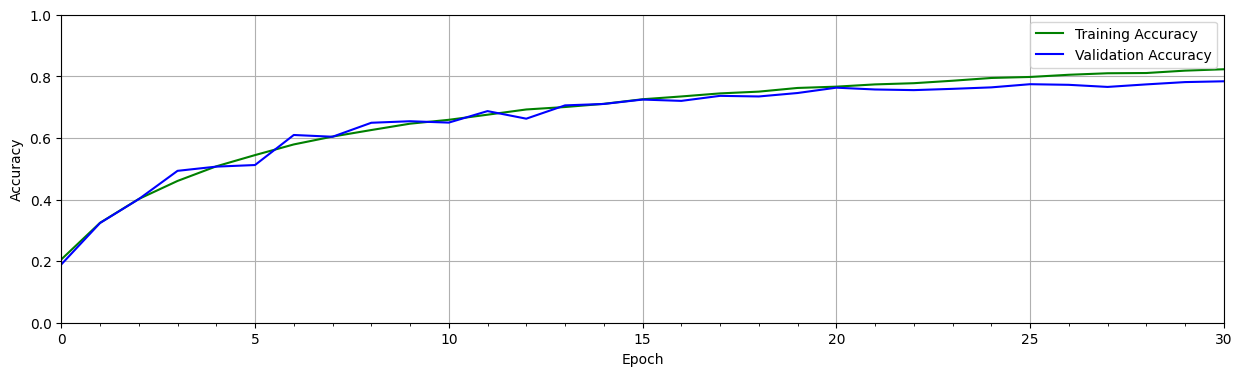

In [17]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

# Saving and Loading Models

In [20]:
model_dropout.save("model_dropout.keras")

In [21]:
from tensorflow.keras.models import load_model
model_dropout_loaded = load_model("model_dropout.keras")

# Evaluation

In [22]:
test_loss, test_acc = model_dropout_loaded.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7899 - loss: 0.6504
Test Loss: 0.6545697450637817
Test Accuracy: 0.7896000146865845


In [25]:
def evaluate_model(dataset, model):
    class_names = [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
    num_rows = 5
    num_cols = 10

    # Retrieve a number of images from the dataset.
    data_batch = dataset[0 : num_rows * num_cols]

    # Get predictions from model.
    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={"fontsize": 13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color="g")
        else:
            plt.setp(title_obj, color="r")

        acc = num_matches / (idx + 1)
    print("Prediction accuracy: ", int(100 * acc) / 100)

    return

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
Prediction accuracy:  0.84


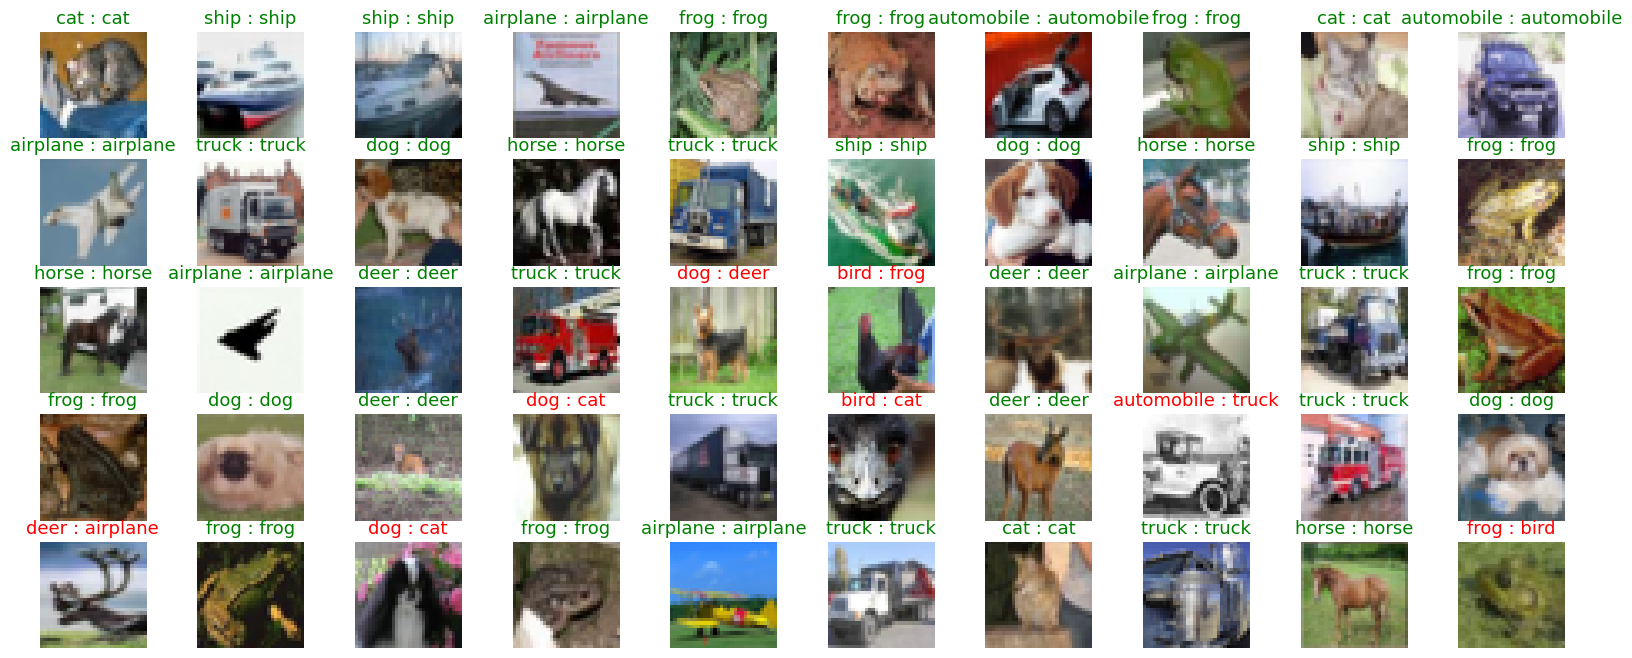

In [26]:
evaluate_model(X_test, model_dropout_loaded)

In [27]:
predictions = model_dropout_loaded.predict(X_test)

predicted_labels = [np.argmax(pred) for pred in predictions]

y_test_integer_labels= tf.argmax(y_test, axis=1)

cm = tf.math.confusion_matrix(y_test_integer_labels, predicted_labels)
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
tf.Tensor(
[[831   7  32  17  29   4   8  10  34  28]
 [ 13 852   0   4   4   3   7   3  15  99]
 [ 60   0 636  42 122  57  50  20   8   5]
 [ 15   4  44 616  81 146  58  15   7  14]
 [ 14   1  23  39 845  17  18  40   1   2]
 [  7   1  20 149  68 699  20  25   4   7]
 [  5   2  23  44  68  19 828   3   5   3]
 [  6   0  32  36  63  40   3 812   1   7]
 [ 51  16  11   9  12   2   5   3 867  24]
 [ 16  27   5  13   4   4   6   5  10 910]], shape=(10, 10), dtype=int32)


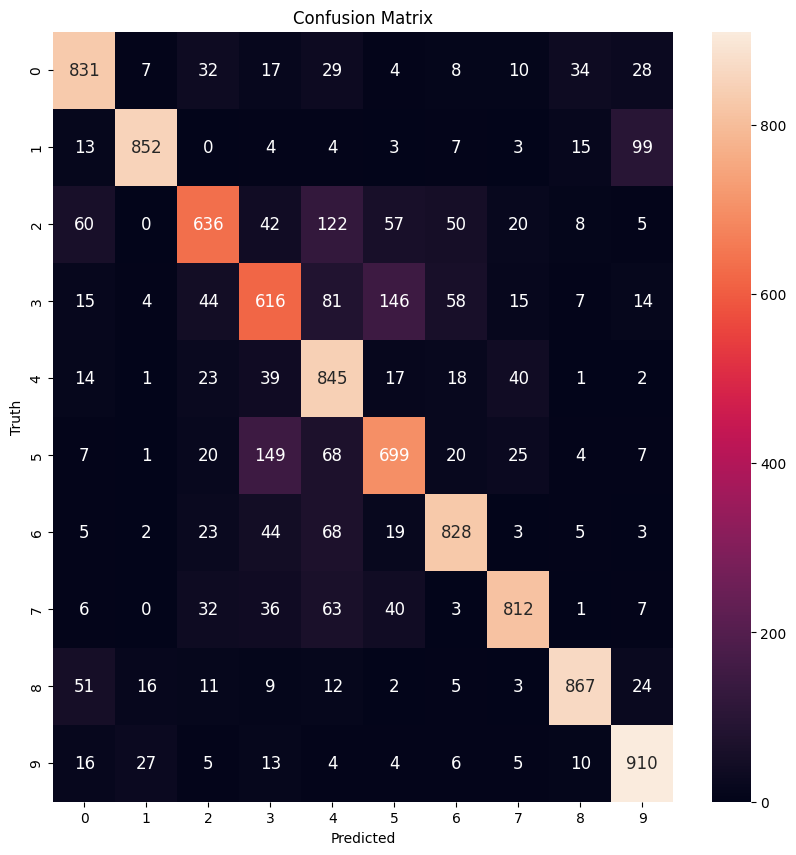

In [30]:
plt.figure(figsize=(10, 10))
import seaborn as sn

sn.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()